In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# Info. about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# Describe dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Data Cleaning
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
crim_avg = round(df['CRIM'].mean(),5)
crim_avg

3.61187

In [18]:
df['CRIM'] = df['CRIM'].fillna(crim_avg)

In [19]:
df['CRIM'].isnull().sum()

0

In [20]:
# Function to fill all nan values
def auto_fillna(col, df):
    col_avg = round(df[col].mean(), 5)
    return df[col].fillna(col_avg)

In [21]:
cols = ['ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
for ele in cols:
    df[ele] = auto_fillna(ele, df)
print("Data cleaned!")

Data cleaned!


In [22]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

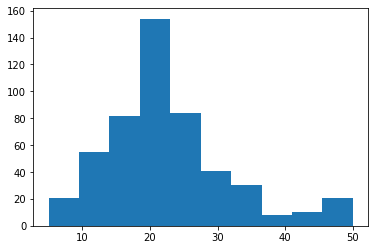

In [23]:
# Data Visualization
plt.hist(df['MEDV'])
plt.show()

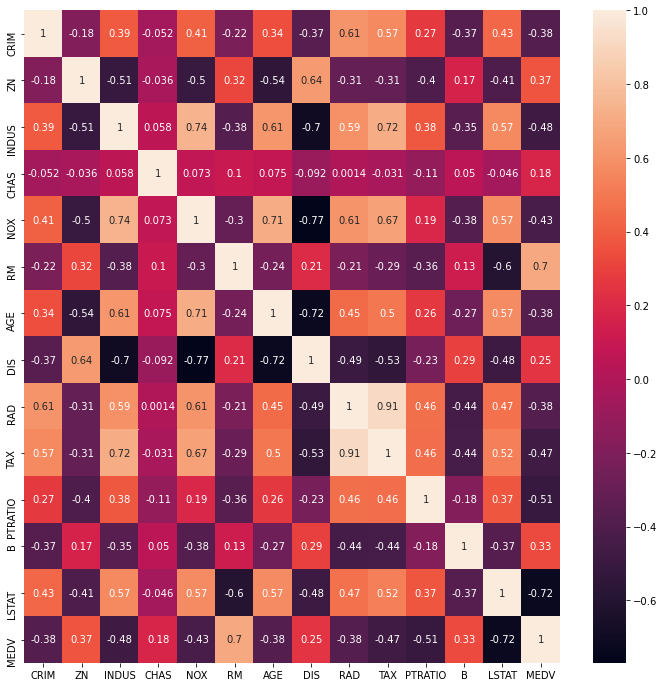

In [27]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

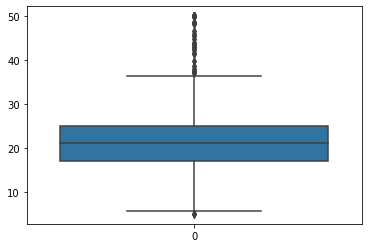

In [35]:
sns.boxplot(data=df['MEDV'])
plt.show()

In [41]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'], test_size=0.2, random_state=1)

In [46]:
# Data Strandalization
from sklearn.preprocessing import StandardScaler
scScale = StandardScaler()
x_train = scScale.fit_transform(x_train)
x_test = scScale.transform(x_test)

In [54]:
# Model creation
from keras.models import Sequential
# Add layers
from keras.layers import Dense

In [62]:
model = Sequential()
model.add(Dense(units=240, activation='relu', input_shape=(13,)))
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=30, activation='relu'))

model.add(Dense(units=1, activation='linear'))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 240)               3360      
_________________________________________________________________
dense_8 (Dense)              (None, 120)               28920     
_________________________________________________________________
dense_9 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 41,401
Trainable params: 41,401
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='mse')

In [68]:
model.fit(x_train, y_train, epochs=300, batch_size=32)

Epoch 1/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1596
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1617
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1350
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1135
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1055
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1627
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1886
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1661
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1213
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1496
Epoch 11/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1964
Epoch 12/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2275
Epoch 13/300
13/13 [=================

13/13 [==============================] - 0s 2ms/step - loss: 0.6969
Epoch 103/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4857
Epoch 104/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4405
Epoch 105/300
13/13 [==============================] - 0s 2ms/step - loss: 0.2741
Epoch 106/300
13/13 [==============================] - 0s 2ms/step - loss: 0.3558
Epoch 107/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3705
Epoch 108/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3418
Epoch 109/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6074
Epoch 110/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4678
Epoch 111/300
13/13 [==============================] - 0s 2ms/step - loss: 0.7080
Epoch 112/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3717
Epoch 113/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2676
Epoch 114/300
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.2947
Epoch 203/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6505
Epoch 204/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6012
Epoch 205/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6242
Epoch 206/300
13/13 [==============================] - 0s 3ms/step - loss: 0.5114
Epoch 207/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4020
Epoch 208/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4228
Epoch 209/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3438
Epoch 210/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4855
Epoch 211/300
13/13 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 212/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1272
Epoch 213/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 214/300
13/13 [=========

In [69]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 12.1344


12.134363174438477